In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://restcountries.com/v3.1/independent?status=true"
try:
  respuesta = requests.get(url)
  respuesta.raise_for_status()
  datos = respuesta.json()
except requests.exceptions.RequestException as e:
  print(f"Error al realizar la solicitud: {e}")

In [ ]:
paises = []
for pais in datos:
  paises.append({
      "nombre": pais["name"]["common"],
      "capital": pais["capital"][0],
      "region": pais["region"],
      "area": pais["area"],
      "poblacion": pais["population"],
      "idiomas": list(pais["languages"].values()),
      "zona horaria": pais["timezones"][0]
  })
paises = pd.DataFrame(paises)
paises = paises.sort_values(by="nombre").reset_index(drop=True)
paises.head(20)

,nombre,capital,region,area,poblacion,idiomas,zona horaria
0,Afghanistan,Kabul,Asia,652230.0,40218234,"[Dari, Pashto, Turkmen]",UTC+04:30
1,Albania,Tirana,Europe,28748.0,2837743,[Albanian],UTC+01:00
2,Algeria,Algiers,Africa,2381741.0,44700000,[Arabic],UTC+01:00
3,Andorra,Andorra la Vella,Europe,468.0,77265,[Catalan],UTC+01:00
4,Angola,Luanda,Africa,1246700.0,32866268,[Portuguese],UTC+01:00
5,Antigua and Barbuda,Saint John's,Americas,442.0,97928,[English],UTC-04:00
6,Argentina,Buenos Aires,Americas,2780400.0,45376763,"[Guaraní, Spanish]",UTC-03:00
7,Armenia,Yerevan,Asia,29743.0,2963234,[Armenian],UTC+04:00
8,Australia,Canberra,Oceania,7692024.0,25687041,[English],UTC+05:00
9,Austria,Vienna,Europe,83871.0,8917205,[German],UTC+01:00


<Axes: title={'center': 'Población por región'}, xlabel='region', ylabel='Población en billones de personas'>

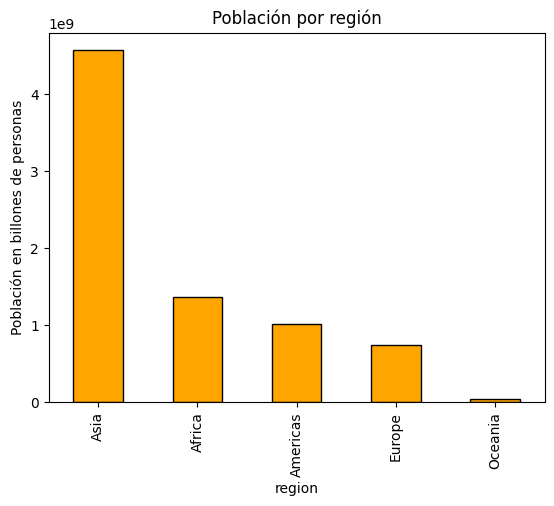

In [ ]:
poblacion_por_region = paises.groupby("region")
poblacion_por_region = poblacion_por_region["poblacion"].sum().sort_values(ascending=False)
poblacion_por_region.plot(kind="bar", title="Población por región", color="orange", edgecolor="black", ylabel="Población en billones de personas")

<Axes: title={'center': 'Top 10 de zonas horarias con más población'}, xlabel='zona horaria', ylabel='Poblacion en billones'>

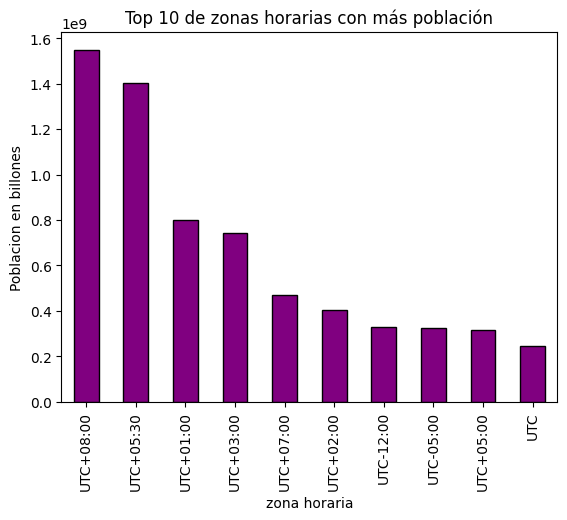

In [ ]:
poblacion_por_zona_horaria = paises.groupby("zona horaria")
poblacion_por_zona_horaria = poblacion_por_zona_horaria["poblacion"].sum().sort_values(ascending=False)
poblacion_por_zona_horaria.head(10).plot(kind="bar", title="Top 10 de zonas horarias con más población", ylabel="Poblacion en billones", color="purple", edgecolor="black")

<Axes: title={'center': 'Número de paises por Región'}>

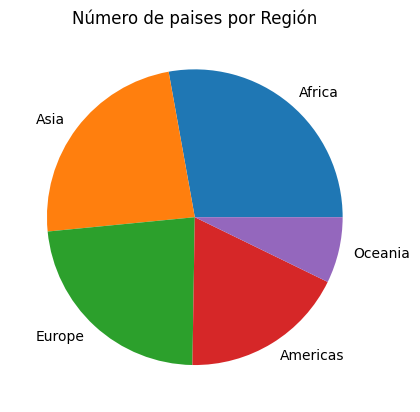

In [ ]:
paises_por_region= paises["region"].value_counts()
paises_por_region.plot(kind="pie", title="Número de paises por Región",ylabel="")